## Amortized mortgage additive payment simulation
It calculates amortized loan schedule with principals and interests. It also lists breakdown of the payment schedule when additive payment is paid.

In [1]:
%cd ..

c:\Users\jongm\Desktop\workspace\global\mortgage_analysis


In [2]:
from src.loan_sim import LoanCalc

In [3]:
LOAN_AMT = 612000
LOAN_TERM = 360 #in month
LOAN_PMT = 3150 #total monthly payment
APR = 0.0325 #in percentage
PTAX = 0 #monthly property taxes
INS = 0 #homeowner's insurance
HOA = 0 #homeowner's association fees
PMI = 0 #private mortgage insurance
OTH = INS + HOA + PMI + 600

In [4]:
lc = LoanCalc(
    P=LOAN_AMT,
    r=APR,
    n=LOAN_TERM,
    O=OTH
)

#### Search optimal payment schedule
Search range is $10000 with a step of $100. The most efficient gain occurs early and gradually decreases after further addition to the monthly. Based on knee/elbow algorithm by Satoopaa et al, the optimal point of knee/elbow is found.

,Additive Down,Total Payment Schedule,Total Interest Paid,Percent Reduced
0,0.0,360.0,346846.56218,0.0
1,100.0,339.0,323674.888238,5.833333
2,200.0,320.0,303523.581352,11.111111
3,300.0,303.0,285822.191453,15.833333
4,400.0,288.0,270139.211152,20.0
5,500.0,275.0,256140.304318,23.611111
6,600.0,263.0,243560.245318,26.944444
7,700.0,251.0,232190.206373,30.277778
8,800.0,241.0,221861.754804,33.055556
9,900.0,232.0,212433.954422,35.555556


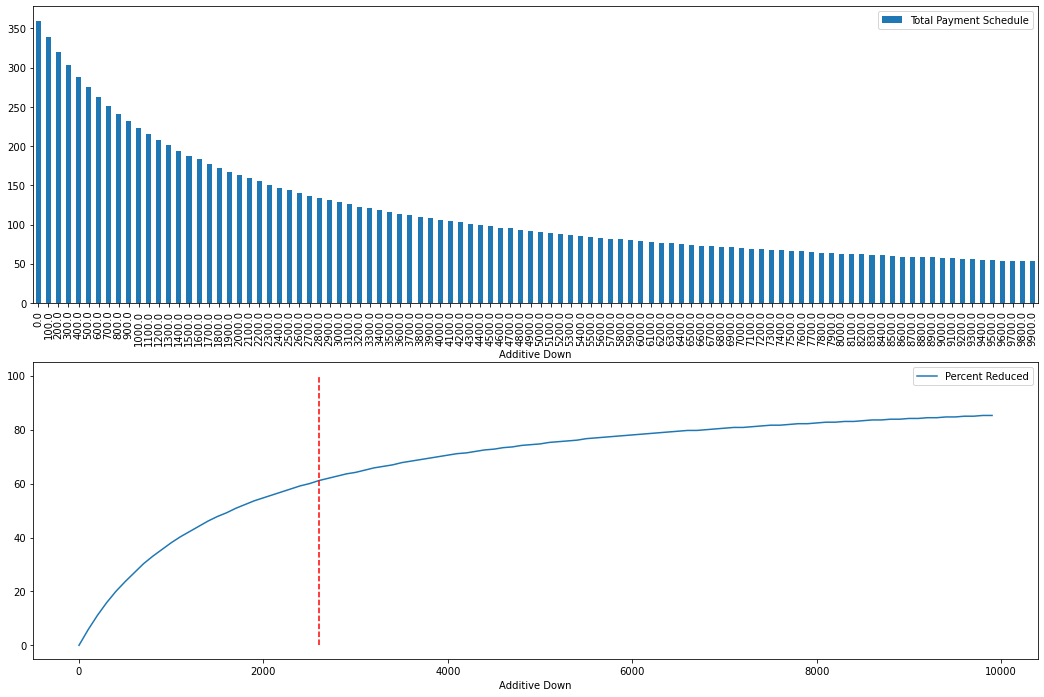

In [5]:
lc.find_optimal_schedule(search_range=range(0, 10000, 100), draw_plot=True, max_rows=20)

#### Amortization table without extra monthly

In [6]:
lc.generate_amortization_table(max_rows=20)

,Beginning Balance,Total Monthly,Interest,Principal,Other,Ending Balance,Total Principal,Total Interest,Percent Paid
1,612000.0,3263.46,1657.5,1005.96,600.0,610994.04,1005.96,1657.5,0.16
2,610994.04,3263.46,1654.78,1008.69,600.0,609985.35,2014.65,3312.28,0.33
3,609985.35,3263.46,1652.04,1011.42,600.0,608973.93,3026.07,4964.32,0.49
4,608973.93,3263.46,1649.3,1014.16,600.0,607959.77,4040.23,6613.62,0.66
5,607959.77,3263.46,1646.56,1016.9,600.0,606942.87,5057.13,8260.18,0.83
6,606942.87,3263.46,1643.8,1019.66,600.0,605923.21,6076.79,9903.98,0.99
7,605923.21,3263.46,1641.04,1022.42,600.0,604900.79,7099.21,11545.03,1.16
8,604900.79,3263.46,1638.27,1025.19,600.0,603875.6,8124.4,13183.3,1.33
9,603875.6,3263.46,1635.5,1027.97,600.0,602847.63,9152.37,14818.8,1.5
10,602847.63,3263.46,1632.71,1030.75,600.0,601816.88,10183.12,16451.51,1.66


#### Regenerate amortization table with optimal knee value

In [7]:
knee = lc.optimal_knee
knee

2600.0

In [8]:
lc.generate_amortization_table(additive=knee)

,Beginning Balance,Total Monthly,Interest,Principal,Other,Ending Balance,Total Principal,Total Interest,Percent Paid
1,612000.0,5863.46,1657.5,3605.96,600.0,608394.04,3605.96,1657.5,0.59
2,608394.04,5863.46,1647.73,3615.73,600.0,604778.31,7221.69,3305.23,1.18
3,604778.31,5863.46,1637.94,3625.52,600.0,601152.79,10847.21,4943.18,1.77
4,601152.79,5863.46,1628.12,3635.34,600.0,597517.45,14482.55,6571.3,2.37
5,597517.45,5863.46,1618.28,3645.19,600.0,593872.26,18127.74,8189.57,2.96
6,593872.26,5863.46,1608.4,3655.06,600.0,590217.2,21782.8,9797.98,3.56
7,590217.2,5863.46,1598.5,3664.96,600.0,586552.24,25447.76,11396.48,4.16
8,586552.24,5863.46,1588.58,3674.88,600.0,582877.36,29122.64,12985.06,4.76
9,582877.36,5863.46,1578.63,3684.84,600.0,579192.52,32807.48,14563.69,5.36
10,579192.52,5863.46,1568.65,3694.82,600.0,575497.71,36502.29,16132.33,5.96
